In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit

In [6]:
filename = "catretina.csv"
data = np.genfromtxt(filename, delimiter=",", names=True, skip_header=1)
collumns = list(data.dtype.names)
print(collumns)

['age', 'centcells', 'pericells', 'retinarea', 'cpRatio']


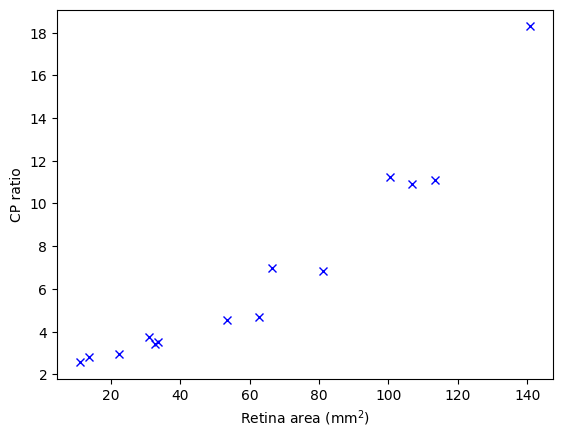

In [29]:
plt.plot(data['retinarea'], data['cpRatio'], "bx")
plt.xlabel("Retina area (mm$^2$)")
plt.ylabel("CP ratio")
plt.show()

In [42]:
xdata = data['retinarea']
ydata = data['cpRatio']

coefs1 = np.polyfit(xdata, ydata, 1)
coefs2 = np.polyfit(xdata, ydata, 2)
coefs3 = np.polyfit(xdata, ydata, 3)

print(coefs1)
print(coefs2)
print(coefs3)

x = np.linspace(min(data['retinarea']), max(data['retinarea']), 100)

y1 = np.poly1d(coefs1)
y2 = np.poly1d(coefs2)
y3 = np.poly1d(coefs3)

[0.10733436 0.01399067]
[ 8.39324440e-04 -1.18691839e-02  2.86847965e+00]
[3.04238592e-06 1.56854767e-04 3.02030651e-02 2.25539455e+00]


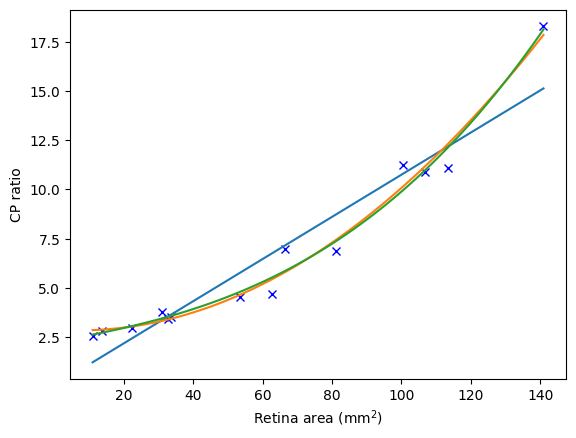

In [32]:
plt.plot(data['retinarea'], data['cpRatio'], "bx")
plt.plot(x, y1(x))
plt.plot(x, y2(x))
plt.plot(x, y3(x))
plt.xlabel("Retina area (mm$^2$)")
plt.ylabel("CP ratio")
plt.show()

In [34]:
res1 = ydata - y1(xdata)
res2 = ydata - y2(xdata)

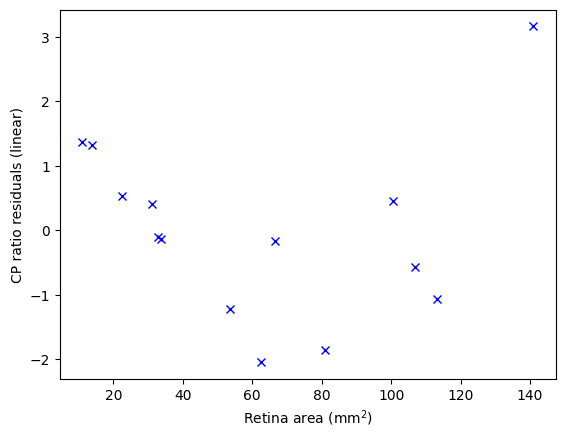

In [37]:
plt.plot(xdata, res1, "bx")
plt.xlabel("Retina area (mm$^2$)")
plt.ylabel("CP ratio residuals (linear)")
plt.show()

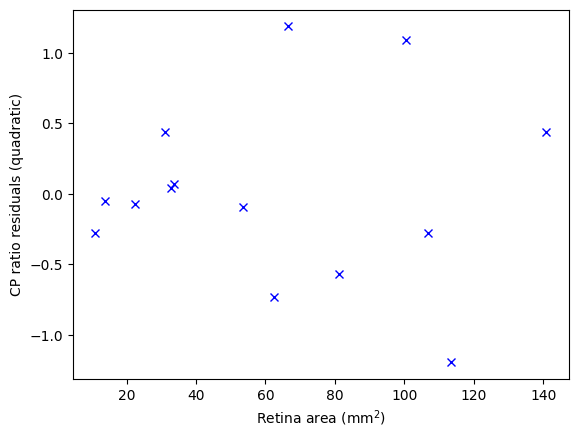

In [38]:
plt.plot(xdata, res2, "bx")
plt.xlabel("Retina area (mm$^2$)")
plt.ylabel("CP ratio residuals (quadratic)")
plt.show()

## Linear regress

0.9539982079341927 1.2386223134575815e-07
0.013990674948053616 0.7175796036811734
0.10733436426511034 0.009737558106776132


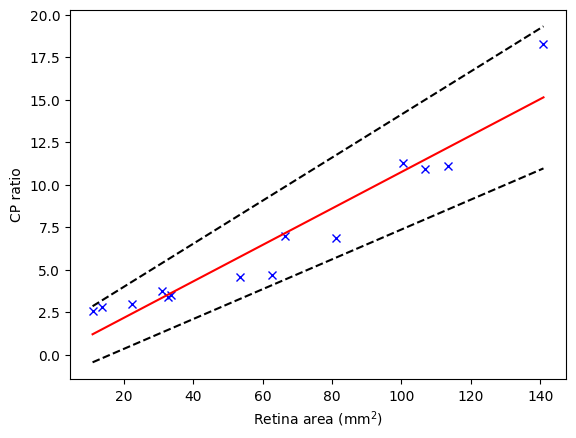

In [48]:
linreg = stats.linregress(xdata, ydata)
print(linreg.rvalue, linreg.pvalue)
print(linreg.intercept, linreg.intercept_stderr)
print(linreg.slope, linreg.stderr)

best = linreg.intercept + linreg.slope * x
w1 = linreg.intercept + 2*linreg.intercept_stderr + (linreg.slope + 2*linreg.stderr) * x
w2 = linreg.intercept - 2*linreg.intercept_stderr + (linreg.slope - 2*linreg.stderr) * x

plt.plot(xdata, ydata, "bx")
plt.plot(x, best, 'r-')
plt.plot(x, w1, 'k--')
plt.plot(x, w2, 'k--')
plt.xlabel("Retina area (mm$^2$)")
plt.ylabel("CP ratio")
plt.show()

In [51]:
from scipy.stats import t

tinv = lambda p, df: abs(t.ppf(p / 2, df))

ts = tinv(0.05, len(xdata) - 2)

print(f"slope (95%): {linreg.slope:.6f} +/- {ts*linreg.stderr:.6f}")

print(ts)

print(
    f"intercept (95%): {linreg.intercept:.6f}" f" +/- {ts*linreg.intercept_stderr:.6f}"
)

slope (95%): 0.107334 +/- 0.021216
2.178812829663418
intercept (95%): 0.013991 +/- 1.563472


* https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html


* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html